In [1]:
#Importing libraries
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv1D,MaxPooling2D,Flatten,BatchNormalization,Dropout,AveragePooling2D
from keras.layers import Activation, Dropout, Flatten, Dense, GaussianNoise, GlobalMaxPooling2D
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import cv2

In [2]:
#Loading dataset
(x_train, y_train), (x_test, y_test)=keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


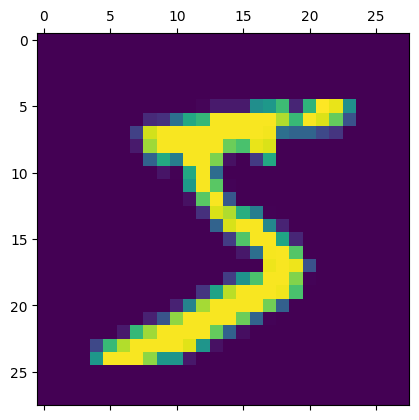

In [3]:
plt.matshow(x_train[0])

In [4]:
(x_train[0]).shape

(28, 28)

In [5]:
#Normailizing
train1=x_train/255
test1=x_test/255

In [6]:
input_shape = (28, 28)

In [7]:
#Model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

In [8]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 19s 8ms/step - loss: 2.4067 - accuracy: 0.8278
Epoch 2/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.4012 - accuracy: 0.9045
Epoch 3/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.2912 - accuracy: 0.9269
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2575 - accuracy: 0.9327
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2337 - accuracy: 0.9408
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2200 - accuracy: 0.9446
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2033 - accuracy: 0.9478
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2032 - accuracy: 0.9491
Epoch 9/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.1939 - accuracy: 0.9518
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.

In [10]:
#Evaluating accuracy on test dataset
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2634 - accuracy: 0.9474


[0.263384610414505, 0.9473999738693237]

In [11]:
#prediction
pre= model.predict(test1)
pre[0]

313/313 [==============================] - 1s 2ms/step


array([0.57302594, 0.38100338, 0.6230718 , 0.42529798, 0.50327533,
       0.34227335, 0.46503663, 0.4224636 , 0.799466  , 0.5376707 ],
      dtype=float32)

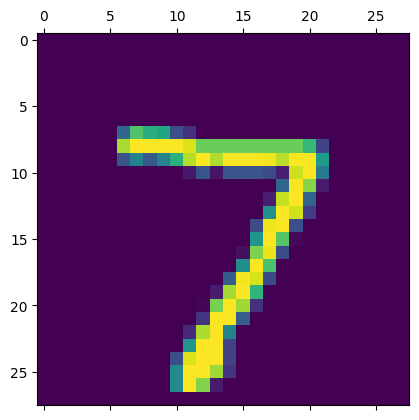

In [12]:
plt.matshow(test1[0])

In [13]:
np.argmax(pre[0])

8

In [14]:
#Converting predictions into digits
pre_labels= [np.argmax(i) for i in pre]

In [16]:
#Confusion matrix
cm = tf.math.confusion_matrix(labels=y_test,predictions=pre_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[   0,    0,    0,    0,    0,    0,    0,    0,  980,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0, 1135,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0, 1032,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0, 1010,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,  982,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,  892,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,  958,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0, 1028,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,  974,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0, 1009,    0]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

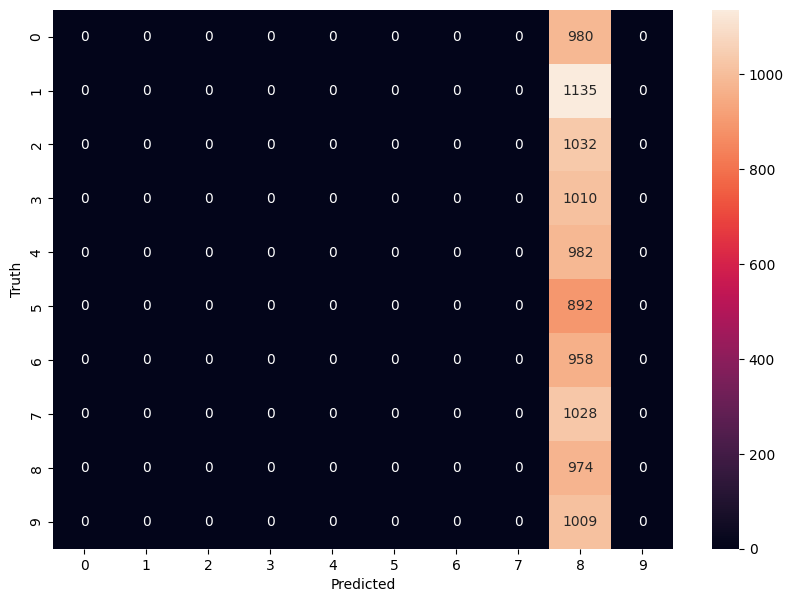

In [17]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')